### Modelling
- Create validation set as 20% random sample from initial dataset.
- Preprocess input features and choose not duplicated and potentially usefull for modeling.
- Train Boosting models (Xgboost, LightGBM) and Random Forest model.
- Evaluate models on the validation set by the following metrics: mean absolute error, mean squared error, mean absolute percentage error, symmetric mean absolute percentage error.

In [1]:
plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('default')
# plt.style.use('fivethirtyeight')

In [2]:
# 1) clean dataset
df = pd.read_csv('data/data_clean.csv')
print(df.shape)
df[:3]

(185039, 28)


,Property_UPRN,Postcode,POST_TOWN,Primary Energy Indicator (kWh/m²/year),Total floor area (m²),Current energy efficiency rating,Potential Energy Efficiency Rating,Current Environmental Impact Rating,Potential Environmental Impact Rating,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,LIGHTING_DESCRIPTION,Current Emissions (T.CO2/yr),Potential Reduction in Emissions (T.CO2/yr),Total current energy costs over 3 years (£),Current heating costs over 3 years (£),Potential heating costs over 3 years (£),Current hot water costs over 3 years (£),Potential hot water costs over 3 years (£),Current lighting costs over 3 years (£),Potential lighting costs over 3 years (£),Part 1 Construction Age Band,Built Form,Property Type,dt_day,dt_month,Country
0,1001100841,EH4 5EZ,EDINBURGH,375.00,94.00,53.00,85.00,45.00,82.00,66.00,2,2,100,6.20,4.20,"3,789.00","2,922.00","1,548.00",645.00,219.00,222.00,222.00,"1,949.00",Semi-Detached,House,2021-01-01,1,EDINBURGH
1,1001950838,EH7 4HE,EDINBURGH,250.00,175.00,66.00,80.00,57.00,75.00,44.00,4,4,100,7.70,2.80,"4,635.00","4,068.00","3,015.00",246.00,246.00,321.00,321.00,"1,929.00",End-Terrace,House,2021-01-01,1,EDINBURGH
2,1000995515,EH4 2DL,EDINBURGH,403.00,72.00,61.00,78.00,48.00,64.00,68.00,1,2,50,4.90,1.60,"3,570.00","2,226.00","1,191.00","1,038.00",564.00,306.00,207.00,"1,975.00",Semi-Detached,Flat,2021-02-01,2,EDINBURGH


In [3]:
# 2) merge with preprocessed description features:
df1 = pd.read_csv('data/features/WALL_DESCRIPTION.csv', sep = '|')
df = df.merge(df1, on = 'Property_UPRN', how = 'left')

df1 = pd.read_csv('data/features/ROOF_DESCRIPTION.csv', sep = '|')
df = df.merge(df1, on = 'Property_UPRN', how = 'left')

In [4]:
# print features for convenient working
for f in df.columns:
    print(f'"{f}",')

"Property_UPRN",
"Postcode",
"POST_TOWN",
"Primary Energy Indicator (kWh/m²/year)",
"Total floor area (m²)",
"Current energy efficiency rating",
"Potential Energy Efficiency Rating",
"Current Environmental Impact Rating",
"Potential Environmental Impact Rating",
"CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)",
"HOT_WATER_ENERGY_EFF",
"HOT_WATER_ENV_EFF",
"LIGHTING_DESCRIPTION",
"Current Emissions (T.CO2/yr)",
"Potential Reduction in Emissions (T.CO2/yr)",
"Total current energy costs over 3 years (£)",
"Current heating costs over 3 years (£)",
"Potential heating costs over 3 years (£)",
"Current hot water costs over 3 years (£)",
"Potential hot water costs over 3 years (£)",
"Current lighting costs over 3 years (£)",
"Potential lighting costs over 3 years (£)",
"Part 1 Construction Age Band",
"Built Form",
"Property Type",
"dt_day",
"dt_month",
"Country",
"Wall_eff_mean",
"Wall_cost_mean",
"Roof_eff_mean",
"Roof_cost_mean",


In [5]:
feats_used = [
    "POST_TOWN",
    "Country",
    "Built Form",
    "Property Type",
    "Part 1 Construction Age Band",
    "Total floor area (m²)",
    "Current energy efficiency rating",
    "Potential Energy Efficiency Rating",
    "Current Environmental Impact Rating",
    "Potential Environmental Impact Rating",
    "HOT_WATER_ENERGY_EFF",
    "HOT_WATER_ENV_EFF",
    "LIGHTING_DESCRIPTION",
    "Current Emissions (T.CO2/yr)",
    "Potential Reduction in Emissions (T.CO2/yr)",
    "CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)",
    "Wall_cost_mean",
    "Roof_cost_mean",
]

In [6]:
df[feats_used][:3]

,POST_TOWN,Country,Built Form,Property Type,Part 1 Construction Age Band,Total floor area (m²),Current energy efficiency rating,Potential Energy Efficiency Rating,Current Environmental Impact Rating,Potential Environmental Impact Rating,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,LIGHTING_DESCRIPTION,Current Emissions (T.CO2/yr),Potential Reduction in Emissions (T.CO2/yr),CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),Wall_cost_mean,Roof_cost_mean
0,EDINBURGH,EDINBURGH,Semi-Detached,House,"1,949.00",94.00,53.00,85.00,45.00,82.00,2,2,100,6.20,4.20,66.00,"3,406.54","4,007.07"
1,EDINBURGH,EDINBURGH,End-Terrace,House,"1,929.00",175.00,66.00,80.00,57.00,75.00,4,4,100,7.70,2.80,44.00,"2,648.86","4,931.43"
2,EDINBURGH,EDINBURGH,Semi-Detached,Flat,"1,975.00",72.00,61.00,78.00,48.00,64.00,1,2,50,4.90,1.60,68.00,"2,669.94",NaN


In [7]:
# we replace towns with less then 10 apperances as OTHER
towns = df['POST_TOWN'].value_counts()
print(len(towns))
towns = {k:k for k in towns[towns >= 10].index}
print(len(towns))
df['POST_TOWN'] = df['POST_TOWN'].map(towns).fillna('OTHER')

664
316


In [8]:
# label encoder of categorical feats
feats_cat = ['POST_TOWN', 'Country', 'Built Form', 'Property Type']
list_lbl  = []
for f in feats_cat:
    lbl = preprocessing.LabelEncoder()
    df[f] = lbl.fit_transform(df[f])
    list_lbl.append(lbl)

In [9]:
# check that last digit of Property_UPRN have uniform distribution
df.Property_UPRN.map(lambda x: str(x)[-1]).value_counts()

6    18658
7    18646
4    18596
3    18508
5    18503
1    18483
8    18464
0    18435
9    18428
2    18318
Name: Property_UPRN, dtype: int64

In [10]:
# Sets creation
import random
# random.seed(1234)

feat_target = "Total current energy costs over 3 years (£)"

# we will use for validation 20% random sample based on the last digit of Property_UPRN (we checked that it have uniform distribution)
filt_fold  = df.Property_UPRN.map(lambda x: str(x)[-1]).isin(['0','1'])

filt_train = ~filt_fold
filt_valid = filt_fold

x, y   = df[filt_train][feats_used], df[filt_train][feat_target]
xv, yv = df[filt_valid][feats_used], df[filt_valid][feat_target]

list_scores = list()

2689.0181135693115


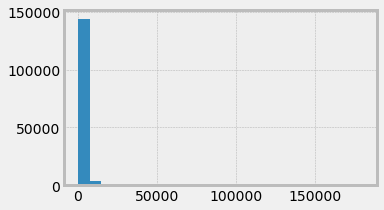

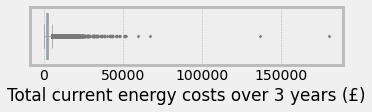

In [11]:
# Target distribution:
print(y.mean())
_ = y.hist(figsize = (5,3), bins = 25)
_, ax = plt.subplots(figsize = (5,1))
_ = sns.boxplot(x=y, color = 'lightblue', ax = ax, linewidth=0.5, saturation=1, fliersize = 2,)

2689.0181135693115


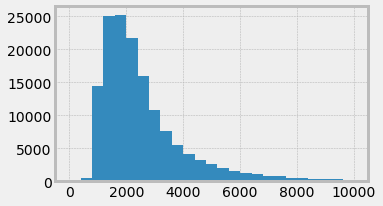

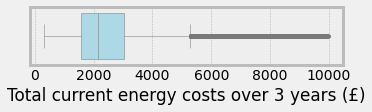

In [12]:
# Target distribution:
print(y.mean())
_ = y.hist(figsize = (5,3), bins = 25, range = (0,10000))
_, ax = plt.subplots(figsize = (5,1))
_ = sns.boxplot(x=y[y<10000], color = 'lightblue', ax = ax, linewidth=0.5, saturation=1, fliersize = 2)

In [13]:
np.percentile(y, q = list(range(100)) + [99.5,99.9])

array([  312.  ,   873.  ,   939.  ,   987.  ,  1026.  ,  1059.  ,
        1089.  ,  1119.  ,  1146.  ,  1173.  ,  1197.  ,  1221.  ,
        1248.  ,  1272.  ,  1299.  ,  1326.  ,  1353.  ,  1380.  ,
        1401.  ,  1425.  ,  1446.  ,  1470.  ,  1494.  ,  1515.  ,
        1536.  ,  1557.  ,  1578.  ,  1599.  ,  1623.  ,  1644.  ,
        1668.  ,  1689.  ,  1713.  ,  1734.  ,  1758.  ,  1782.  ,
        1806.  ,  1830.  ,  1854.  ,  1878.  ,  1899.  ,  1923.  ,
        1950.  ,  1974.  ,  1998.  ,  2022.  ,  2049.  ,  2073.  ,
        2097.  ,  2124.  ,  2148.  ,  2175.  ,  2202.  ,  2229.  ,
        2259.  ,  2286.  ,  2316.  ,  2346.  ,  2376.  ,  2406.  ,
        2439.  ,  2472.  ,  2505.  ,  2538.  ,  2577.  ,  2613.  ,
        2655.  ,  2694.  ,  2736.  ,  2781.  ,  2823.  ,  2871.  ,
        2922.  ,  2973.  ,  3033.  ,  3090.  ,  3150.  ,  3216.  ,
        3285.  ,  3363.  ,  3441.  ,  3528.  ,  3612.  ,  3708.  ,
        3813.  ,  3933.  ,  4062.  ,  4200.  ,  4347.  ,  4515

In [14]:
def ts_metrics(y_true, y_pred):
    return {
        'mae': metrics.mean_absolute_error(y_true, y_pred),
        'mse': metrics.mean_squared_error(y_true, y_pred),
        'mape': np.mean(np.abs((y_true - y_pred) / y_true)),
        'smape': np.mean(np.abs( 2*(y_true - y_pred) / (y_true+np.abs(y_pred)))),
    }

#### Xgboost

In [15]:
# Training process
import xgboost as xgb
x_ = xgb.DMatrix(x.values, 
                label = y, 
                feature_names = feats_used)
xv_ = xgb.DMatrix(xv.values, 
                label = yv, 
                feature_names = feats_used) 

params = {
        'booster': 'gbtree',
        'tree_method': 'hist',
        'objective': 'reg:squarederror', 
        # 'eval_metric': 'logloss',
        'eta': 0.1,
        'max_depth': 5,  # -1 means no limit
        'subsample': 1,  # Subsample ratio of the training instance.
        'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree.
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': -1,
        'verbosity': 0
    }       


early_stopping_rounds = 50
num_boost_round       = 1000

evals_results = dict()
model_xgb = xgb.train(params, 
             x_, 
             evals=[
                 (x_,'train'), 
                 (xv_,'valid'),
             ], 
             evals_result=evals_results, 
             num_boost_round=num_boost_round,
             early_stopping_rounds=early_stopping_rounds,
             verbose_eval=1000)

[0]	train-rmse:3083.63940	valid-rmse:3042.14453
[999]	train-rmse:164.65927	valid-rmse:326.45010


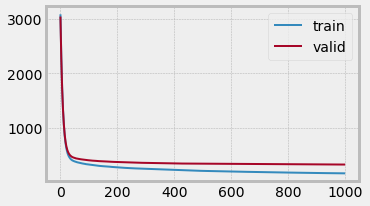

In [16]:
# Learning curve
df_evals = pd.DataFrame({
            'train': evals_results['train']['rmse'],
            'valid': evals_results['valid']['rmse'],
})
_ = df_evals.plot(figsize = (5,3))

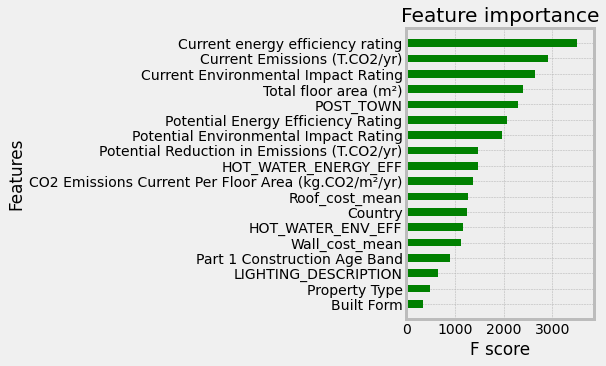

In [17]:
# Feature importances
_, ax = plt.subplots(1,1, figsize = (3,5))
_ = xgb.plot_importance(model_xgb, ax = ax, max_num_features=30, height=0.5, 
                        show_values=False, color = 'green')

In [18]:
# metrics on validation set
y_pred = model_xgb.predict(xv_)
score1 = ts_metrics(yv, y_pred)
list_scores.append(score1)
print(score1)

{'mae': 113.9050707855051, 'mse': 106569.8027249841, 'mape': 0.03294286206145003, 'smape': 0.03271637261885592}


#### Random forest

In [19]:
from sklearn import ensemble

model_rf = ensemble.RandomForestRegressor(n_estimators=500, max_depth=None, n_jobs=-1)
_ = model_rf.fit(x.fillna(0), y)

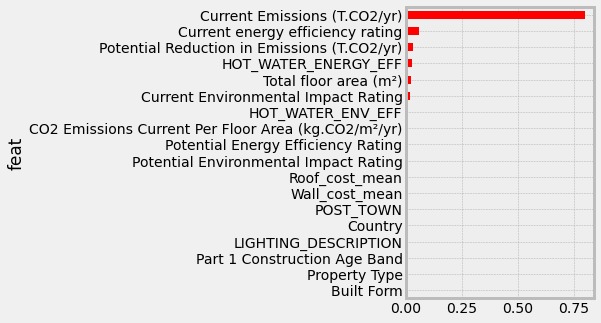

In [20]:
# Feature importances
df_imp = pd.Series(model_rf.feature_importances_, index = feats_used)
df_imp = df_imp/sum(df_imp)
df_imp = df_imp.reset_index()
df_imp.rename(columns={'index':'feat',0:'imp'}, inplace = True)
df_imp = df_imp.sort_values(by = 'imp')
p = df_imp.set_index('feat').imp.plot(kind = 'barh', figsize = (3,5), color = 'red')

In [21]:
# metrics on validation set
y_pred = model_rf.predict(xv.fillna(0))
score1 = ts_metrics(yv, y_pred)
list_scores.append(score1)
print(score1)

{'mae': 125.45625150820139, 'mse': 179852.6899862635, 'mape': 0.03225056075505955, 'smape': 0.031851973369599086}


### Lightgbm

In [22]:
# Training process
import lightgbm as lgb

x_ = lgb.Dataset(x.values, 
                label = y, 
                feature_name = feats_used,
                categorical_feature = feats_cat,
                free_raw_data=False)
xv_ = lgb.Dataset(xv.values, 
                label = yv, 
                feature_name = feats_used,
                categorical_feature = feats_cat,
                free_raw_data=False)

In [23]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',

    'learning_rate': 0.1,
    'num_boost_round': 1000,
    'early_stopping_rounds': 50,

    'nthread': -1,
    'verbose': 0,

    # fitting params
    'boost_from_average': True,
    'scale_pos_weight': 1,
    
    'max_bin': 255,
    
    'num_leaves': 63,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 1e-3,
    'min_split_gain': 0,

    'subsample': 1,
    'colsample_bytree': 1,

    'reg_alpha': 0, 
    'reg_lambda': 0,

}

evals_results = {}
model_lgb     = lgb.train(params,
                        x_,
                        valid_sets=[x_, xv_ ], 
                        valid_names=['train', 'valid'], 
                        evals_result=evals_results, 
                        verbose_eval=1000, 
                        feval=None)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[651]	train's l2: 23613.3	valid's l2: 111304


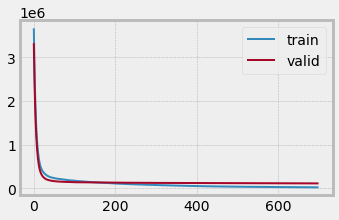

In [24]:
p = pd.DataFrame(dict([(k,evals_results[k]['l2']) for k in evals_results])).plot(figsize = (5,3))

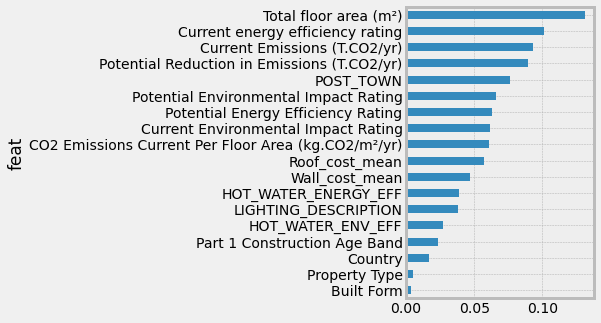

In [25]:
# feature importances
df_imp = pd.Series(model_lgb.feature_importance(), index = feats_used)
df_imp = df_imp/sum(df_imp)
df_imp = df_imp.reset_index()
df_imp.rename(columns={'index':'feat',0:'imp'}, inplace = True)
df_imp = df_imp.sort_values(by = 'imp')
p = df_imp.set_index('feat').imp.plot(kind = 'barh', figsize = (3,5), )

In [26]:
# metrics on validation set
y_pred = model_lgb.predict(xv)
score1 = ts_metrics(yv, y_pred)
list_scores.append(score1)
print(score1)

{'mae': 113.7229722654839, 'mse': 111303.6603009807, 'mape': 0.03210053928939238, 'smape': 0.0318685652183521}


### Results

In [27]:
df_out = pd.options.display.float_format = '{:,.4f}'.format
df_out = pd.DataFrame(list_scores).T
df_out.columns = ['Xgboost','Random Forest','LightGBM']
df_out

,Xgboost,Random Forest,LightGBM
mae,113.9051,125.4563,113.7230
mse,"106,569.8027","179,852.6900","111,303.6603"
mape,0.0329,0.0323,0.0321
smape,0.0327,0.0319,0.0319
